<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_13/Atmospheric_Carbondioxide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
data_file = '../../data_external/CO2_levels'

In [3]:
import shutil
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
A= urllib.request.urlopen(data_url)
B = open(data_file, 'wb')
shutil.copyfileobj(A, B)
B.close()

In [4]:
data = np.genfromtxt(data_file, skip_header=72,names=("year", "month", "date","average"))

# Mask invalid values using numpy's masked array

data['average'] = np.ma.masked_invalid(data['average'])


# Define column names
columns = ['year', 'month', 'date', 'average']

# Create a pandas DataFrame from the masked data
data_frame = pd.DataFrame(data)


# Display the resulting DataFrame
data_frame

,year,month,date,average
0,1960.0,9.0,1960.7077,314.17
1,1960.0,10.0,1960.7896,313.83
2,1960.0,11.0,1960.8743,315.00
3,1960.0,12.0,1960.9563,316.19
4,1961.0,1.0,1961.0411,316.89
...,...,...,...,...
752,2023.0,5.0,2023.3750,424.00
753,2023.0,6.0,2023.4583,423.68
754,2023.0,7.0,2023.5417,421.83
755,2023.0,8.0,2023.6250,419.68


In [5]:
# Define the quadratic function to fit
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

In [7]:
from scipy.optimize import curve_fit


In [8]:
# Perform the quadratic curve fit
x = np.arange(len(data_frame))
y = data_frame['average']
popt, _ =curve_fit(quadratic_function, x, y)

# Extract the coefficients of the quadratic fit
a, b, c = popt

In [9]:
# Calculate the rate of change (derivative)
rate_of_change = 2 * a * x[-1] + b

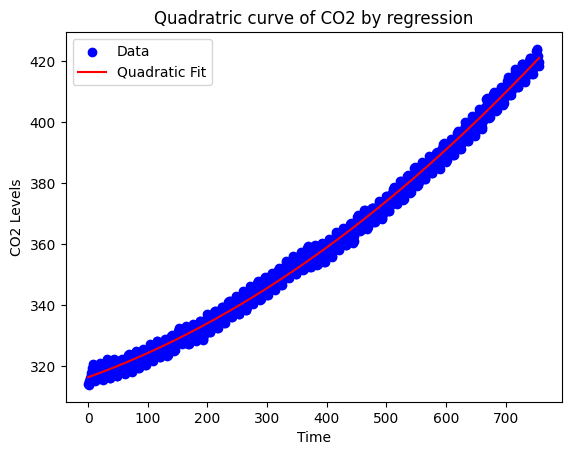

In [20]:
plt.figure()
plt.scatter(x, y, label='Data', color='b')
plt.plot(x, quadratic_function(x, a, b, c), 'r', label='Quadratic Fit')
plt.title("Quadratric curve of CO2 by regression")
plt.xlabel("Time")
plt.ylabel("CO2 Levels")
plt.legend()
plt.show()

In [13]:
rate_of_change

0.20657556904139085

In [18]:
if rate_of_change > 0:
    print("YES! The rate of increase of CO2 is increasing.")
else:
    print("The rate of increase of CO2 is not increasing.")

YES! The rate of increase of CO2 is increasing.
